In [ ]:
from tqdm import tqdm
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as sp

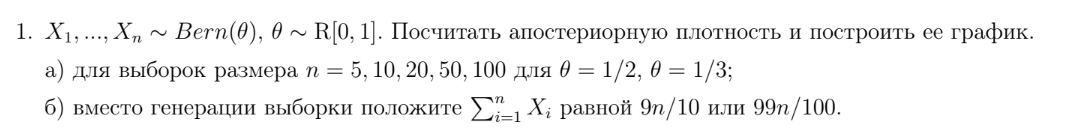

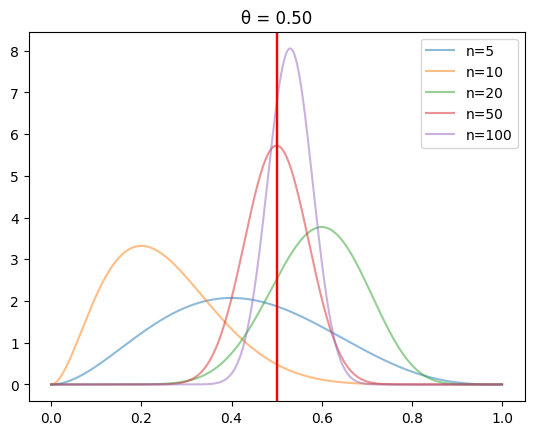

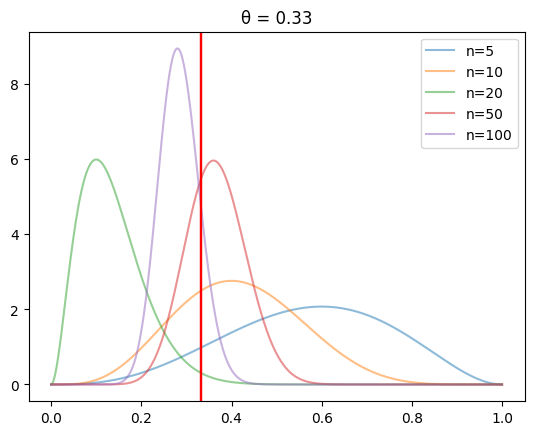

In [ ]:
arr = [5, 10, 20, 50, 100]
def task(arr, theta):
  rv = sts.bernoulli(theta)
  for n in arr:
      x = rv.rvs(n)
      def f(u):
          return (
              u ** (np.sum(x))
              * (1 - u) ** (len(x) - np.sum(x))
              / sp.beta(1 + np.sum(x), n + 1 - np.sum(x))
          )
      xx = np.linspace(0, 1, 1000)
      func = np.vectorize(f)
      y = func(xx)
      plt.title("θ = %0.2f"%theta)
      ax.plot(xx, y, alpha=0.5, label = "n=%d"%n)
      ax.axvline(theta, color='red')
      ax.legend()
  plt.show()

fig, ax = plt.subplots()
task(arr, 1/2)
ax.legend()
fig, ax = plt.subplots()
task(arr, 1/3)
ax.legend()

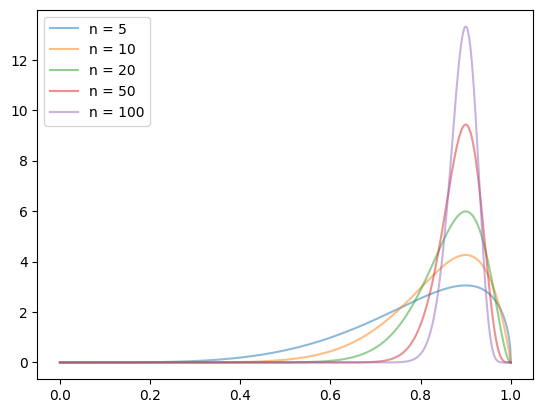

In [ ]:
plt.figure()
arr = [5, 10, 20, 50, 100]
for n in arr:
    sumx = 9 * n / 10
    def f(u):
        return u ** (sumx) * (1 - u) ** (n - sumx) / sp.beta(1 + sumx, n + 1 - sumx)
    xx = np.linspace(0, 1, 1000)
    func = np.vectorize(f)
    y = func(xx)
    plt.plot(xx, y, label=f"n = {n}", alpha=0.5)
    plt.legend(loc="best")
plt.show()

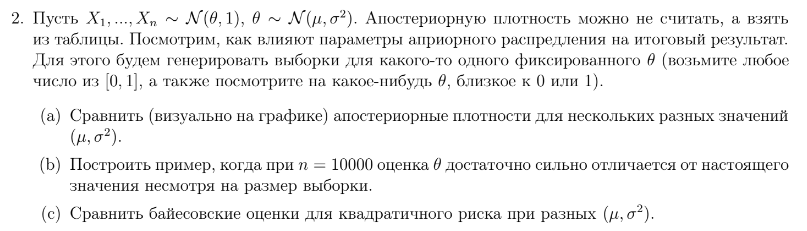

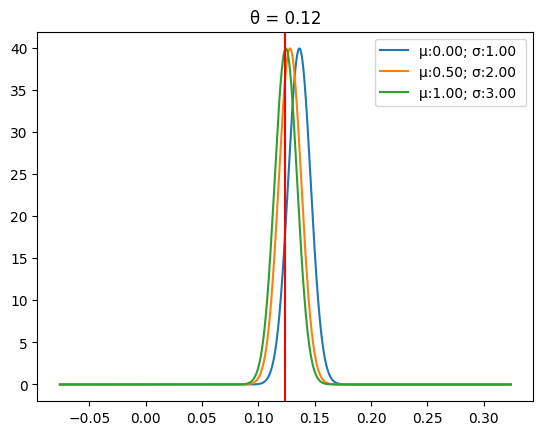

In [ ]:
theta = np.random.uniform(0,1,size=1)
theta1 = 0.05
theta2 = 0.95
def taska(theta, mu, sigma_1, n):
    xx = np.linspace(theta - 0.2, theta+0.2, n)
    x = sts.norm.rvs(loc = n*theta, scale = np.sqrt(n))
    loc = (mu/sigma_1**2 + x)/(1/sigma_1**2 + n)
    scale = (1/sigma_1**2 + n)**(-1/2)
    f = sts.norm.pdf(xx, loc=loc, scale=scale)
    ax.plot(xx, f, label="μ:%0.2f; σ:%0.2f "%(mu, sigma_1))

fig, ax = plt.subplots()
plt.title("θ = %0.2f"%theta)
taska(theta, 0, 1, 10000)
taska(theta, 0.5, 2, 10000)
taska(theta, 1, 3, 10000)
ax.axvline(theta, color='r')
ax.legend()

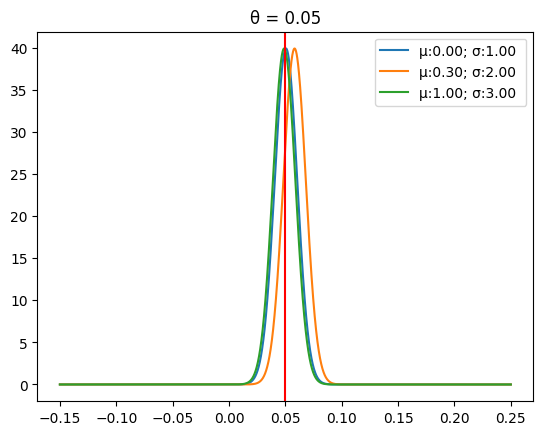

In [ ]:
theta1 = 0.05
fig, ax = plt.subplots()
plt.title("θ = %0.2f"%theta1)
taska(theta1, 0,1, 10000)
taska(theta1, 0.3,2, 10000)
taska(theta1, 1,3, 10000)
ax.axvline(theta1, color='r')
ax.legend()

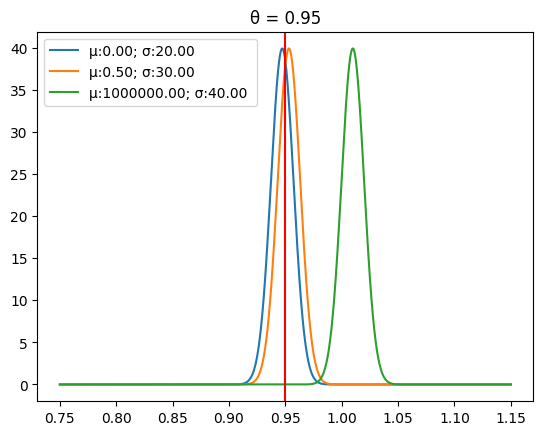

In [ ]:
theta2 = 0.95
fig, ax = plt.subplots()
plt.title("θ = %0.2f"%theta2)
taska(theta2, 0, 20, 10000)
taska(theta2, 0.5, 30, 10000)
taska(theta2, 1000000, 40, 10000)
ax.axvline(theta2, color='r')
ax.legend()

In [ ]:
theta = np.random.uniform(0,1)
def taska(theta:float, mu, sigma_1, n):
    x = sts.norm.rvs(loc = n*theta, scale = np.sqrt(n))
    loc = (mu/sigma_1**2 + x)/(1/sigma_1**2 + n)
    print(f"bayes estimate: {loc}; real θ: {theta}")
    print('')
taska(theta, 0,1, 10000)
taska(theta, 10,20, 10000)
taska(theta, 100,300, 10000)
taska(theta, -100,1000, 10000)


bayes estimate: 0.2500130465055708; real θ: 0.2547035439198283

bayes estimate: 0.25896219107836976; real θ: 0.2547035439198283

bayes estimate: 0.25776703314887117; real θ: 0.2547035439198283

bayes estimate: 0.25028684417067876; real θ: 0.2547035439198283



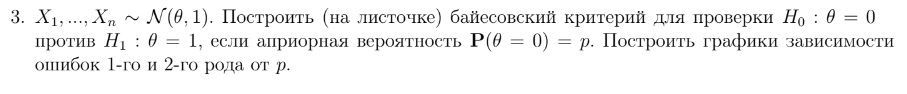

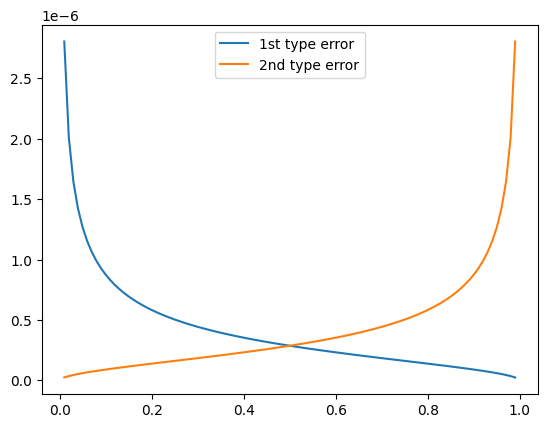

In [ ]:
p = np.linspace(0.01,0.99,100)
def error_1(p:np.array):
    res = 1 - sts.norm.cdf(np.log(p/(1-p)) + n/2, loc=0, scale=np.sqrt(n))
    return res
def error_2(p:np.array):
    res = sts.norm.cdf(np.log(p/(1-p)) + n/2, loc=n, scale=np.sqrt(n))
    return res

fig, ax = plt.subplots()
ax.plot(p, error_1(p), label = "1st type error")
ax.plot(p, error_2(p), label = "2nd type error")
plt.legend()